# Project 3: Recommender Systems
### Serena Tang, Liwen Yang, Winston Wang

### QUESTION 1
***Explore the Dataset: In this question, we explore the structure of the data.***
- ***A) Compute the sparsity of the movie rating dataset:*** $Sparsity = \dfrac{Total number of available ratings}{Total number of possible ratings}$
    - The spasity of the movie rating dataset is 0.016999683055613623; this implies that most users did not rate every movie. 

In [1]:
import pandas as pd
import numpy as np

# import ratings data
ratings_df = pd.read_csv('ratings.csv')

# create R matrix 
R = ratings_df.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
R.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
R_sparsity = np.count_nonzero(R)/R.size
print('Sparsity of Rating Matrix: ', R_sparsity)

Sparsity of Rating Matrix:  0.016999683055613623


- ***B) Plot a histogram showing the frequency of the rating values: Bin the raw rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R that fall within each bin and use this count as the height of the vertical axis for that particular bin. Comment on the shape of the histogram.***
    - The data is slightly left skewed with most users leaving 4.0 rating on a movie. Most people rated the movie 3.0 and above, implying that users either usually enjoyed the movies they watched or those who did not enjoy the movies were less likely to give the movie a poor rating. 

Text(0, 0.5, 'Frequency')

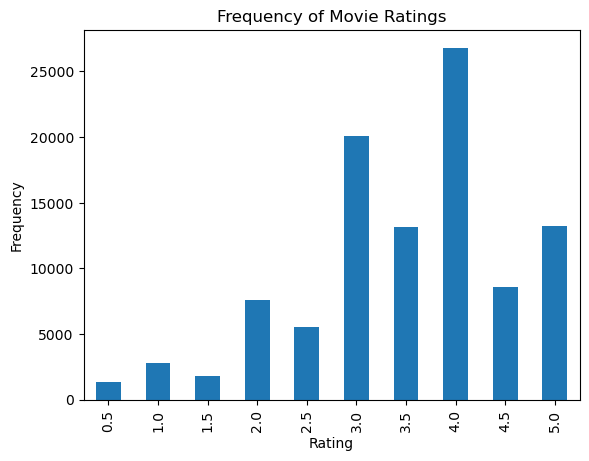

In [3]:
import matplotlib.pyplot as plt

# plot rating frequency
ratings_df.rating.value_counts().sort_index().plot(kind = 'bar')
plt.title('Frequency of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

- ***C) Plot the distribution of the number of ratings received among movies: The X-axis should be the movie index ordered by decreasing frequency and the Y -axis should be the number of ratings the movie has received; ties can broken in any way. A monotonically decreasing trend is expected.***
    - The plot is shown below. 

Text(0, 0.5, 'Number of Ratings Recieved')

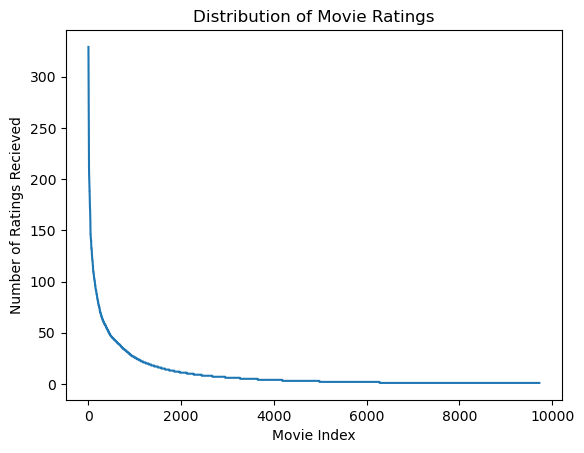

In [4]:
# plot rating distribution
plt.plot(list(ratings_df.movieId.value_counts().sort_values(ascending=False).values))
plt.title('Distribution of Movie Ratings')
plt.xlabel('Movie Index')
plt.ylabel('Number of Ratings Recieved')

- ***D) Plot the distribution of ratings among users: The X-axis should be the user index ordered by decreasing frequency and the Y -axis should be the number of movies the user has rated. The requirement of the plot is similar to that in Question C.***
    - The plot is shown below. 

Text(0, 0.5, 'Number of Movies Rated')

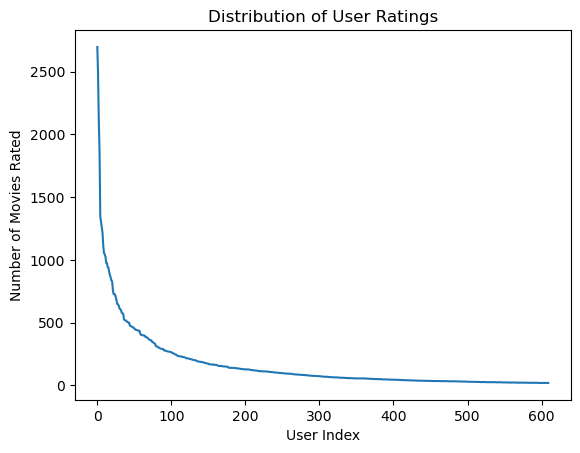

In [5]:
# plot rating distribution
plt.plot(list(ratings_df.userId.value_counts().sort_values(ascending=False).values))
plt.title('Distribution of User Ratings')
plt.xlabel('User Index')
plt.ylabel('Number of Movies Rated')

- ***E) Discuss the salient features of the distributions from Questions C,D and their implications for the recommendation process.***
    - Based on the distribution from part D, it appears that there are a few people who rate a lot of movies; this implies that most users usually rate only a few movies while a select few rate a lot of movies. Similarly, from the distribution from part C, it appears that most movies only have a few reviews while a small amount of movies have a lot of reviews. This can imply that many people will only rate a few movies that they feel strongly about while some people may rate all the movies they watch. 
    - These observations can imply that there may be an issue recommending movies to users as that user may not have rated enough movies for the system to send them a "good" recommendation or a movie may not have enough ratings for it to be pushed to users. This implies that the data may need to be processed to predict how users who rate a movie may rate another to push "good" recommendations to users whle also not pushing "bad" recommendations to users. 

- ***F) Compute the variance of the rating values received by each movie: Bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the resulting histogram.***
    - The histogram is shown below. The plot is heavily right skewed as most variances are between 0 and 1 with few a variances being larger than 3. 

Text(0, 0.5, 'Number of Movies')

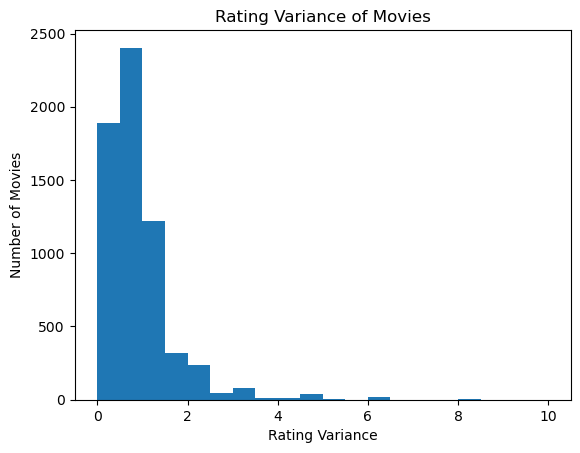

In [6]:
# get variance of ratings per movie
movies = np.unique(ratings_df.movieId)
rating_var = []
for i in movies:
    rating_var.append(ratings_df[ratings_df['movieId']==i].rating.var())

# plot variance
plt.hist(rating_var, bins = np.arange(0, max(rating_var), 0.5))
plt.title('Rating Variance of Movies')
plt.xlabel('Rating Variance')
plt.ylabel('Number of Movies')

### QUESTION 2
- ***A) Write down the formula for $\mu_u$ in terms of $I_u$ and $r_{uk}$***
    - $\mu_u = \frac{\sum_{k \in I_u} r_{uk} }{n(I_u)}$
    - $n(I_u)$ indicates the number of items that user $u$ rated
- ***B) In plain words, explain the meaning of $I_u \cap I_v$. Can $I_u \cap I_v$ = ∅? (Hint: Rating matrix R is sparse)***
    - $I_u \cap I_v$ is the intersection of items that user $u$ and user $v$ have rated; this is how many items that user $u$ and user $v$ have both rated. It is possible for $I_u \cap I_v$ = ∅ as this just means that user $u$ and user $v$ did not rate the same items; this appears to be very common as matrix $R$ is very sparse. 

### QUESTION 3
- ***Can you explain the reason behind mean-centering the raw ratings ($r_{vj} − \mu_v$) in the prediction function? (Hint: Consider users who either rate all items highly or rate all items poorly and the impact of these users on the prediction function.)***
    - Mean-centering the data helps to normalise the data to help prevent the data from overfitting the data due to outliers (users who either always very highly or very lowly rate items) as they can heavily skew the model/recommendations. 

### QUESTION 4
- ***Design a k-NN collaborative filter to predict the ratings of the movies in the original dataset and evaluate its performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).***
    - The two plots are shown below. 

Text(0, 0.5, 'Average MAE')

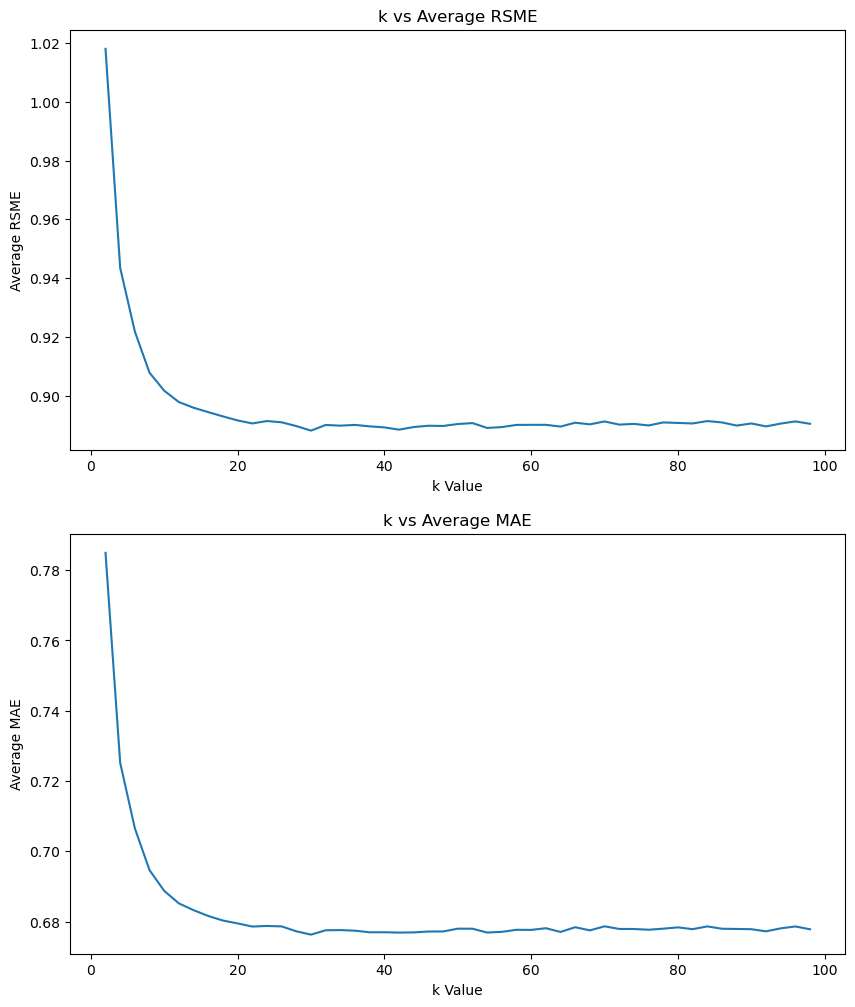

In [7]:
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise import Dataset, Reader

# load data
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_df[["userId", "movieId", "rating"]], reader)

# calculate rmse and mae for each k
k = range(2,100,2)
rsme = []
mae = []
for i in k:
    algo = KNNWithMeans(k=i, sim_options = {"name": "pearson"})
    result = cross_validate(algo, data, cv=10, n_jobs=-1)
    rsme.append(np.mean(result['test_rmse']))
    mae.append(np.mean(result['test_mae']))

# plot RMSE and MAE
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.plot(k, rsme)
plt.title('k vs Average RMSE')
plt.xlabel('k Value')
plt.ylabel('Average RMSE')

plt.subplot(2, 1, 2)
plt.plot(k, mae)
plt.title('k vs Average MAE')
plt.xlabel('k Value')
plt.ylabel('Average MAE')

### QUESTION 5
- ***Use the plot from question 4, to find a `minimum k`. Note: The term `minimum k` in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then `minimum k` would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE.***

### QUESTION 6
- ***Within EACH of the 3 trimmed subsets in the dataset, design (train and validate): A k-NN collaborative filter on the ratings of the movies (i.e Popular, Unpopular or High-Variance) and evaluate each of the three models’ performance using 10-fold cross validation:***
    - ***Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.***
    - ***Plot the ROC curves for the k-NN collaborative filters for threshold values $[2.5,3,3.5,4]$. These thresholds are applied only on the ground truth labels in held-out validation set. For each of the plots, also report the area under the curve (AUC) value. You should have 4 × 4 plots in this section (4 trimming options – including no trimming times 4 thresholds) - all thresholds can be condensed into one plot per trimming option yielding only 4 plots.***
- ***We provide you with the following hints:***
    - ***Write trimming function that takes as input the set of data and outputs a trimmed set;***
    - ***For each value of k, split the trimmed dataset into 10 pairs of training and validation sets. (trainset 1, testset 1), (trainset 2, testset 2), . . . , (trainset 10, testset 10)***
    - ***For each pair of (trainset, testset):***
        - ***Train the collaborative filter on the trimmed train set***
        - ***Predict the ratings of the movies in the trimmed validation set using the trained collaborative filter***
        - ***Compute the RMSE of the predictions in the trimmed validation set***
    - ***Compute the average RMSE by averaging across all the 10 folds.***
    - ***For the ROC plotting, split the dataset into 90% for training and 10% for validation.***

In [8]:
#Trimming data
from collections import defaultdict

raw_ratings = data.raw_ratings

Moveid_ratings_dict = defaultdict(list)

for ele in raw_ratings:
    Moveid_ratings_dict[ele[1]].append(ele[2])

def get_list(name, dictionary):
    A_list = []
    if name == "High_variance":
        for ele in dictionary:
            if len(dictionary[ele]) >= 5 and np.var(dictionary[ele]) >= 2:
                A_list.append(ele)
               
    elif name == "Unpopular":
        for ele in dictionary:
            if len(dictionary[ele]) <= 2:
                A_list.append(ele)
    else:
        for ele in dictionary:
            if len(dictionary[ele]) > 2:
                A_list.append(ele)
               
    return A_list
           


# More than 2 ratings
Popular = get_list("Popular", Moveid_ratings_dict)

# <= 2 ratings
Unpopular = get_list("Unpopular", Moveid_ratings_dict)

# >= 2 variance and >= 5 ratings
High_variance = get_list("High_variance", Moveid_ratings_dict)

### QUESTION 7
- ***Understanding the NMF cost function: Is the optimization problem given by equation 5 convex? Consider the optimization problem given by equation 5. For U fixed, formulate it as a least-squares problem.***
    - not convex, have 2 variables, explore second derivative of equation -> matrix not always semi positive def

### QUESTION 8
- ***A) Design a NMF-based collaborative filter to predict the ratings of the movies in the original dataset and evaluate its performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. If NMF takes too long, you can increase the step size. Increasing it too much will result in poorer granularity in your results. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y- axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.***
- ***B( Use the plot from the previous part to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?***
- ***C) Performance on trimmed dataset subsets: For each of Popular, Unpopular and High- Variance subsets***
    - ***Design a NMF collaborative filter to predict the ratings of the movies in the trimmed subset and evaluate its performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds.***
    - ***Plot average RMSE (Y-axis) against k (X-axis); item Report the minimum average RMSE.***
- ***Plot the ROC curves for the NMF-based collaborative filter and also report the area under the curve (AUC) value as done in Question 6.***

### QUESTION 9
- ***Perform Non-negative matrix factorization on the ratings matrix R to obtain the factor matrices U and V , where U represents the user-latent factors interaction and V represents the movie-latent factors interaction (use k = 20). For each column of V , sort the movies in descending order and report the genres of the top 10 movies. Do the top 10 movies belong to a particular or a small collection of genre? Is there a connection between the latent factors and the movie genres?***

### QUESTION 10

- ***A) Design a MF-based collaborative filter to predict the ratings of the movies in the original dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.***
- ***B) Design a MF-based collaborative filter to predict the ratings of the movies in the original dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.***
- ***C) Performance on dataset subsets: For each of Popular, Unpopular and High-Variance subsets***
    - ***Design a MF collaborative filter to predict the ratings of the movies in the trimmed subset and evaluate its performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds.***
    - ***Plot average RMSE (Y-axis) against k (X-axis); item Report the minimum average RMSE.***
- ***Plot the ROC curves for the MF-based collaborative filter and also report the area under the curve (AUC) value as done in Question 6***

### QUESTION 11

- ***Design a naive collaborative filter to predict the ratings of the movies in the original dataset and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.***
- ***Performance on dataset subsets: For each of Popular, Unpopular and High-Variance test subsets***
    - ***Design a naive collaborative filter to predict the ratings of the movies in each trimmed set and evaluate it’s performance using 10-fold cross validation.***
    - ***Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.***

In [9]:
from surprise.model_selection.split import KFold
from sklearn.metrics import mean_squared_error
    
# get average rating per user
def naive_collab_filter(rating):
    user_ratings={}
    user_ave_rating = {}
    for i in rating: 
        if i[0] not in user_ratings.keys():
            user_ratings[i[0]] = [i[2]]
        else:
            user_ratings[i[0]].append(i[2])
    for user in user_ratings.keys():
        user_ave_rating[user] = np.mean(user_ratings[user])
    return user_ave_rating

# calculate rmse 
def calculate_RMSE(user_ave, data, filtertype, filtermovies):
    rmse = 0
    kfold_10 = KFold(n_splits=10)
    if filtertype == 'Original':
        for trainset, testset in kfold_10.split(data):
            predicted_rating = [user_ave[i[0]] for i in testset]
            true_rating = [i[2] for i in testset]
            rmse += np.sqrt(mean_squared_error(true_rating, predicted_rating))
    else:
        for trainset, testset in kfold_10.split(data):
            filter_data = [i for i in testset if i[1] in filtermovies]
            predicted_rating = [user_ave[i[0]] for i in filter_data]
            true_rating = [i[2] for i in filter_data]
            rmse += np.sqrt(mean_squared_error(true_rating, predicted_rating))
    return rmse/10

In [14]:
## original data
original_average = naive_collab_filter(data.raw_ratings)
original_rsme = calculate_RMSE(original_average, data, 'Original', data)
print('Average RMSE for original data set using naive collaborative filtering: ', original_rsme)

## popular
popular_rsme = calculate_RMSE(original_average, data, 'Popular', Popular)
print('Average RMSE for Popular movie Trimming data set using naive collaborative filtering: ', popular_rsme)

## unpopular
unpopular_rsme = calculate_RMSE(original_average, data, 'Unpopular', Unpopular)
print('Average RMSE for Unopular movie Trimming data set using naive collaborative filtering: ', unpopular_rsme)

## high_variance
hv_rsme = calculate_RMSE(original_average, data, 'High Variance', High_variance)
print('Average RMSE for High Variance movie Trimming data set using naive collaborative filtering: ', hv_rsme)

Average RMSE for original data set using naive collaborative filtering:  0.9346992985193179
Average RMSE for Popular movie Trimming data set using naive collaborative filtering:  0.9323132685610975
Average RMSE for Unopular movie Trimming data set using naive collaborative filtering:  0.9713397970160784
Average RMSE for High Variance movie Trimming data set using naive collaborative filtering:  1.4654251769359041


### QUESTION 12
- ***Comparing the most performant models across architecture: Plot the best ROC curves (threshold = 3) for the k-NN, NMF, and MF with bias based collaborative filters in the same figure. Use the figure to compare the performance of the filters in predicting the ratings of the movies.***

### QUESTION 13

- ***Understanding Precision and Recall in the context of Recommender Systems: Precision and Recall are defined by the mathematical expressions given by equations 12 and 13 respectively. Please explain the meaning of precision and recall in your own words.***

### QUESTION 14

- ***Comparing the precision-recall metrics for the different models:***
- ***For each of the three architectures:***
    - ***Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using the model’s predictions.***
    - ***Plot the average recall (Y-axis) against t (X-axis) and plot the average precision (Y-axis) against average recall (X-axis).***
    - ***Use the best k found in the previous parts and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.***
- ***Plot the best precision-recall curves obtained for the three models (k-NN, NMF, MF) in the same figure. Use this figure to compare the relevance of the recommendation list generated using k-NN, NMF, and MF with bias predictions.***
- ***Hints:***
    - ***Use threshold = 3 for obtaining the set G***
    - ***Use 10-fold cross-validation to obtain the average precision and recall values for each value of t. To be specific, compute precision and recall for each user using equations 12 and 13 and then average across all the users in the dataset to obtain the precision and recall for this fold. Now repeat the above procedure to compute the precision and recall for all the folds and then take the average across all the 10-folds to obtain the average precision and average recall value for this value of t.***
    - ***If |G| = 0 for some user in the validation set, then drop this user***
    - ***If some user in the validation set has rated less than t items, then drop this user.***